In [1]:
import requests

# Get all python jobs from the github jobs API
r = requests.get('https://jobs.github.com/positions.json?description=python&page=0')

# How to join different pages of json?
postings = r.json()

In [2]:
import  requests
from collections import Counter

# Count how many job postings exist at any given location
count = Counter(posting['location'] for posting in postings)

print(count)

Counter({'Boston, MA': 3, 'Washington, DC': 2, 'Austin, Texas': 2, 'Berlin': 2, 'London, UK': 2, 'New York City': 2, 'Cupertino, CA': 2, 'London': 2, 'North America': 2, 'Paris': 1, 'New York, NY': 1, '800 5th Avenue, Suite 2800, Seattle, WA 98104': 1, 'Cambridge, MA': 1, 'Denver, CO': 1, 'Paris, France': 1, 'Essen': 1, 'Lexington, MA': 1, 'Barcelona': 1, 'Coppell, TX': 1, 'Seattle, WA': 1, 'Trondheim/Oslo, Norway': 1, 'Westerville': 1, 'Sindelfingen, Germany': 1, 'Stuttgart': 1, 'Los Angeles': 1, 'Austin': 1, 'Chicago, IL': 1, 'New York, NY, US': 1, 'Mountain View': 1, 'Indianapolis or REMOTE': 1, 'Deutschland, Hamburg': 1, 'Hamburg ': 1, 'United States and Canada': 1, 'San Francisco': 1, 'Austin, TX, USA': 1, 'Munich, Germany': 1, 'Brisbane CBD Australia': 1, 'New York, New York': 1, 'NY or LA': 1, 'Europe': 1})


In [24]:
import pandas as pd
source = pd.read_csv("/home/code/Desktop/test/data/population_engineers_hurricanes.csv")

source

,state,id,population,engineers,hurricanes
0,Alabama,1,4863300,0.003422,22
1,Alaska,2,741894,0.001591,0
2,Arizona,4,6931071,0.004774,0
3,Arkansas,5,2988248,0.002440,0
4,California,6,39250017,0.007126,0
5,Colorado,8,5540545,0.008088,0
6,Connecticut,9,3576452,0.005897,10
7,Delaware,10,952065,0.004989,2
8,District of Columbia,11,681170,0.011759,0
9,Florida,12,20612439,0.003300,110


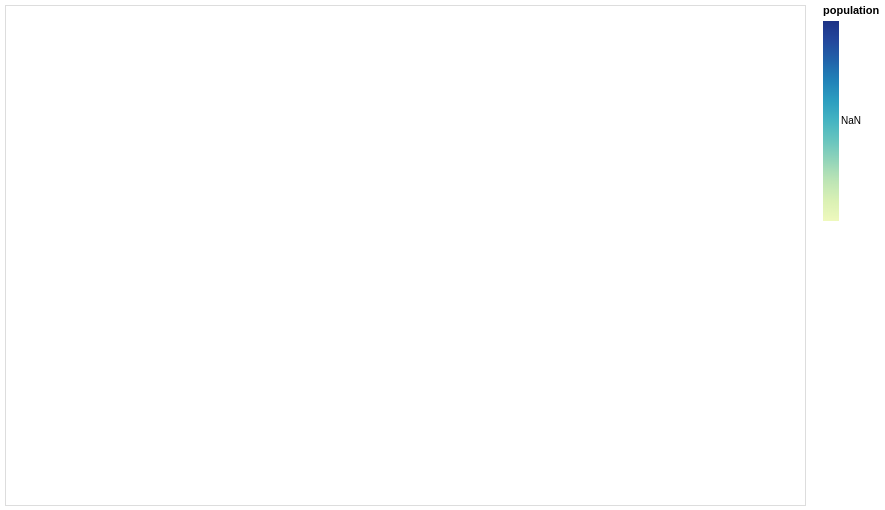

In [39]:
import altair as alt
from vega_datasets import data
import pandas as pd

alt.renderers.enable('notebook')

counties = alt.topo_feature(data.us_10m.url,'counties')

source = pd.read_csv("/home/code/Desktop/test/data/population_engineers_hurricanes.csv"
    ,      # relative python path to subdirectory
    sep='\t',           # Tab-separated value file.
    quotechar="'",        # single quote allowed as quote character
    dtype={"id": int},             # Parse the salary column as an integer 
)


alt.Chart(counties).mark_geoshape().encode(
    color='population:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['population'])
).project(
    type='albersUsa'
).properties(
    width=800,
    height=500
)